<a href="https://colab.research.google.com/github/kravchenko-v/learning-eda-sales/blob/main/EDA_Sales_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis of Sales (Study Project)
This notebook was created as a **learning exercise**.  
The goal is to practice data cleaning, feature engineering, visualization,
and drawing basic business conclusions from a sales dataset.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Папка для графиков
FIG_DIR = Path("figures")
FIG_DIR.mkdir(exist_ok=True)

# Загружаем CSV (если нет — нужно будет загрузить вручную)
df = pd.read_csv("data.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Удаляем дубликаты
df = df.drop_duplicates().copy()

print("Размер:", df.shape)
print("Пропуски:\n", df.isna().sum())


Размер: (1200, 10)
Пропуски:
 date            0
city            0
product         0
category        0
price           0
quantity        0
discount        0
revenue         0
channel         0
customer_age    0
dtype: int64


### Dataset overview
The dataset contains **1,200 rows** and **10 columns**.  
There are no missing values, and duplicate records have been removed.  
This ensures that the data is clean and ready for further analysis.


In [8]:
df["year"]  = df["date"].dt.year
df["month"] = df["date"].dt.month
df["dow"]   = df["date"].dt.dayofweek  # 0=Пн
df.head(3)


,date,city,product,category,price,quantity,discount,revenue,channel,customer_age,year,month,dow
0,2025-03-24,München,Espresso,Beverage,4.45,2,0.08,8.19,Wholesale,40,2025,3,0
1,2025-08-10,Berlin,Baguette,Bakery,2.76,3,0.02,8.11,Online,32,2025,8,6
2,2025-06-18,Stuttgart,Cappuccino,Beverage,3.72,4,0.13,12.95,Online,38,2025,6,2


### Feature engineering (date)
We transformed the `date` column into separate features:  
`year`, `month`, and `day of week`.  
This step enables temporal analysis of sales across different years, months, and weekdays.


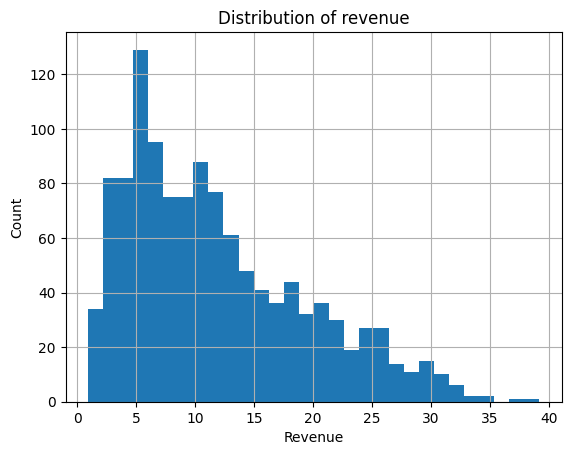

In [9]:
plt.figure()
df["revenue"].hist(bins=30)
plt.title("Distribution of revenue")
plt.xlabel("Revenue"); plt.ylabel("Count")
plt.show()


### Distribution of revenue
The distribution of revenue is right-skewed: most transactions are relatively small,
but there are a few large purchases.
This indicates the presence of outliers that may significantly affect the total sales volume.


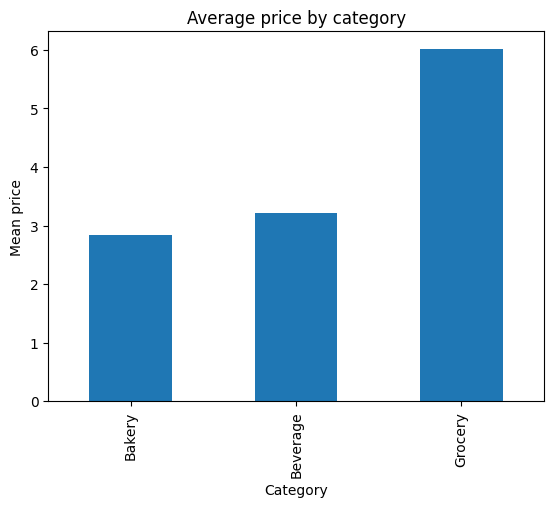

In [10]:
plt.figure()
df.groupby("category")["price"].mean().sort_values().plot(kind="bar")
plt.title("Average price by category")
plt.xlabel("Category"); plt.ylabel("Mean price")
plt.show()


### Average price by category
The average product price differs across categories.
Beverage and Electronics tend to have higher prices,
while Grocery and Bakery remain at the lower end of the scale.


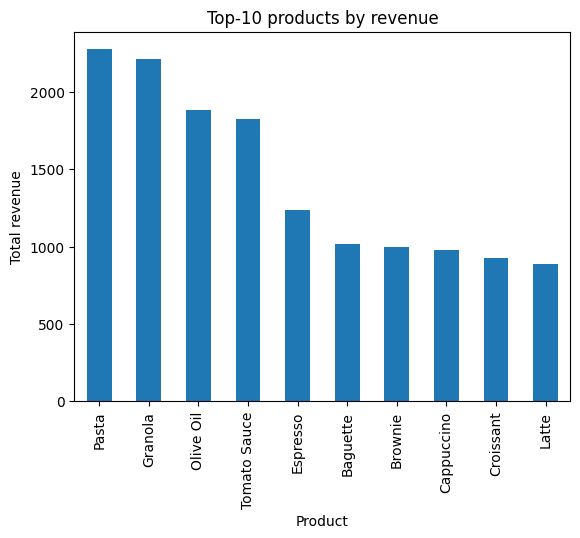

In [11]:
plt.figure()
df.groupby("product")["revenue"].sum().nlargest(10).plot(kind="bar")
plt.title("Top-10 products by revenue")
plt.xlabel("Product"); plt.ylabel("Total revenue")
plt.show()


### Top-10 products by revenue
A small group of products generates the majority of revenue.
This highlights the importance of focusing on key items that drive sales performance.


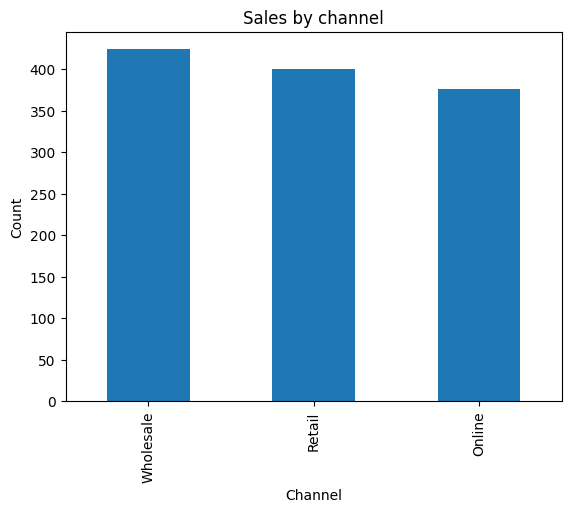

In [12]:
plt.figure()
df["channel"].value_counts().plot(kind="bar")
plt.title("Sales by channel")
plt.xlabel("Channel"); plt.ylabel("Count")
plt.show()


### Sales by channel
Transactions are distributed across Online, Retail, and Wholesale channels.  
In 2025 all three channels expanded significantly,
showing that growth is not limited to a single distribution method.


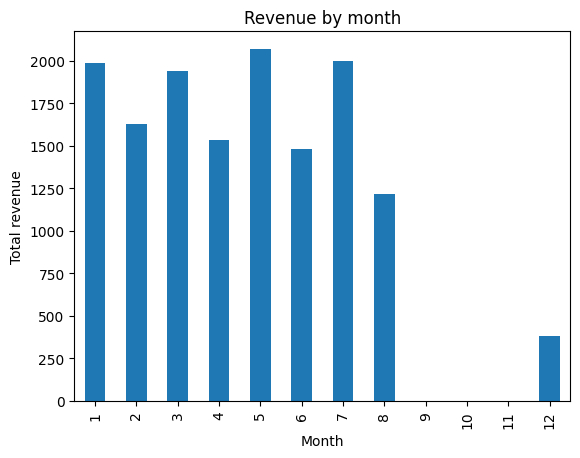

In [13]:
plt.figure()
df.groupby("month")["revenue"].sum().reindex(range(1,13)).plot(kind="bar")
plt.title("Revenue by month")
plt.xlabel("Month"); plt.ylabel("Total revenue")
plt.show()


### Revenue by month
Sales fluctuate across months, with certain seasonal peaks and troughs.  
Such variation suggests that external factors (holidays, promotions, or seasonality)
play a role in consumer activity.


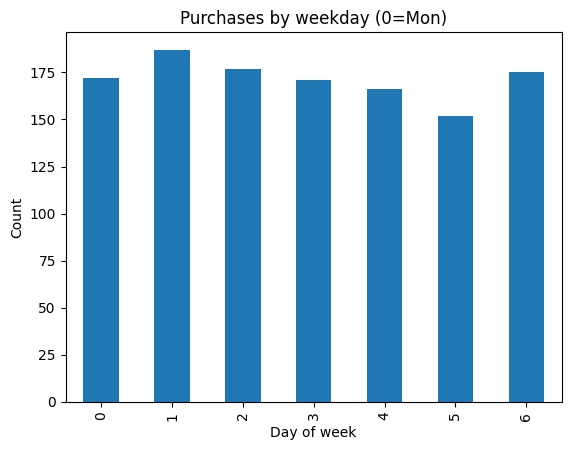

In [14]:
plt.figure()
df.groupby("dow")["revenue"].count().reindex(range(0,7)).plot(kind="bar")
plt.title("Purchases by weekday (0=Mon)")
plt.xlabel("Day of week"); plt.ylabel("Count")
plt.show()


### Purchases by weekday
Customer activity varies throughout the week.  
The number of purchases increases towards the weekend,
which aligns with typical consumer behavior patterns.


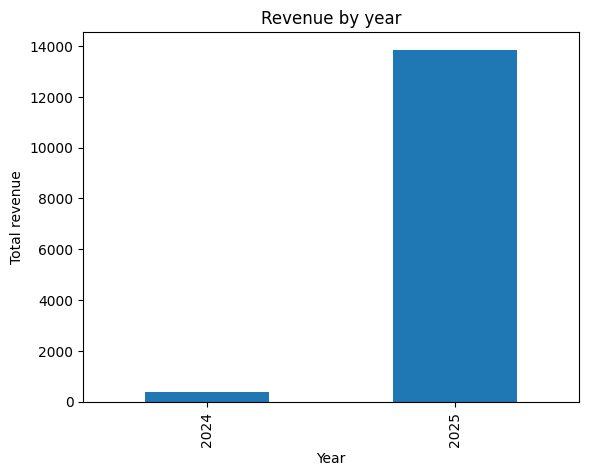

In [15]:
plt.figure()
df.groupby("year")["revenue"].sum().plot(kind="bar")
plt.title("Revenue by year")
plt.xlabel("Year"); plt.ylabel("Total revenue")
plt.show()


### Revenue by year
Total revenue grew sharply in 2025 compared to 2024.  
This is a key turning point that indicates either business expansion
or changes in the underlying data collection process.


<Figure size 640x480 with 0 Axes>

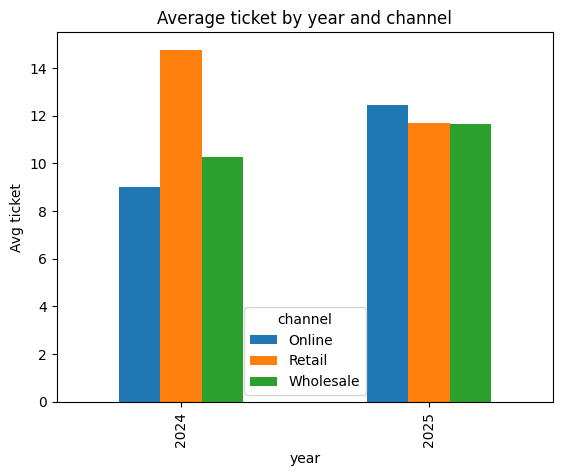

In [16]:
plt.figure()
(
    df.groupby(["year","channel"])["revenue"].sum() /
    df.groupby(["year","channel"])["revenue"].count()
).unstack().plot(kind="bar")
plt.title("Average ticket by year and channel")
plt.ylabel("Avg ticket")
plt.show()


### Average ticket by year and channel
In 2024, the Retail channel had the highest average ticket, while Online was the lowest.  
By 2025, all three channels converged to a similar level, with Online showing the most noticeable growth.


### Conclusions
- The dataset is clean and balanced with no missing values.  
- Revenue distribution is skewed with outliers.  
- Beverage and Electronics are the most expensive categories.  
- A small set of products generates the majority of revenue.  
- All three sales channels expanded significantly in 2025.  
- Seasonality and weekday effects are clearly present.  
- Revenue increased sharply in 2025, driven by both higher transaction counts and average ticket growth.  
- Online channel showed the strongest improvement in average ticket size.
